In [136]:
import matplotlib.pyplot as plt
import math
import random 
pikachu = []
pichu = []
pichu_x = []
pichu_y = []
pikachu_x = []
pikachu_y = []
# Reading data from datapoints. 
with open("datapoints.txt") as f_reads:
     for line in f_reads.read().split("\n"):
        line = line.split(",")
        if line[-1].strip() == "0":
                pichu.append([float(line[0]), float(line[1])])
                pichu_x.append(float(line[0].strip()))
                pichu_y.append(float(line[1].strip()))
        if line[-1].strip() == "1":
                pikachu.append([float(line[0]), float(line[1])])
                pikachu_x.append(float(line[0].strip()))
                pikachu_y.append(float(line[1].strip()))


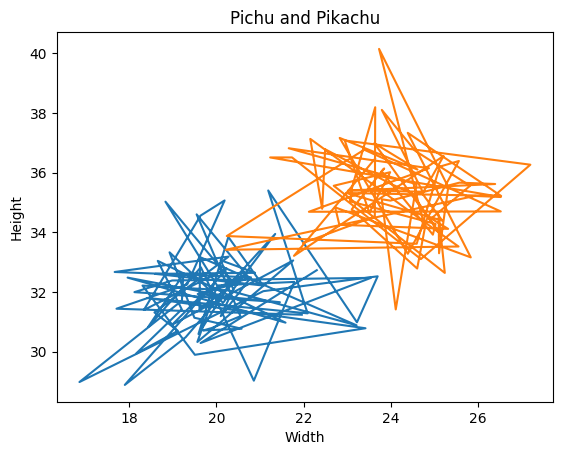

In [137]:
# plot our data
plt.plot(pichu_x, pichu_y)
plt.plot(pikachu_x, pikachu_y)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Pichu and Pikachu")
plt.show()


In [138]:
# Read testpoints from testpoints.txt
test_points = []
with open("testpoints.txt", "r") as f_reader:
    for line in f_reader.read().split("\n"):
        if "(" in line:
            line = line.split(",")
            test_points.append(
                [float(line[0].split("(")[1]), float(line[1].split(")")[0].strip())])

In [139]:
def calculate_distance(point_one: list, point_two: list):
    """
    Calculate the distance between two points according to euclidean distance. 
     param: 
        point_one: list of two floats
        point_two: list of two floats
     return: float The distance between the two given points
    """
    first_element = (point_one[0] - point_two[0]) ** 2
    second_element = (point_one[1] - point_two[1]) ** 2
    return math.sqrt(first_element + second_element)

In [140]:
def find_distances(point):
    """
    Find the distances between a given point and all the points in the dataset.
     param point: list of two floats
     return: list of floats The distances between the given point and all the points in the dataset.
    """
    distances = list()

    for j in pichu:
        distances.append([calculate_distance(point, j), 0])

    for k in pikachu:
        distances.append([calculate_distance(point, k), 1])

    distances.sort()

    return distances


In [141]:
for test_point in test_points:
    print(
        f"Sample with (width, height) : ({test_point[0]}, {test_point[1]}) classified as", end=" ")
    distances = find_distances(test_point)
    if distances[0][1] == 0:
        print("pichu")
    else:
        print("pikachu")

Sample with (width, height) : (25.0, 32.0) classified as pikachu
Sample with (width, height) : (24.2, 31.5) classified as pikachu
Sample with (width, height) : (22.0, 34.0) classified as pikachu
Sample with (width, height) : (20.5, 34.0) classified as pichu


In [142]:
# User can input a point to classify it as pichu or pikachu
try:
    width = float(input("Enter the width: "))
    height = float(input("Enter the height: "))
    if width > 0.0 and height > 0.0:
        distances = find_distances([width, height])
        if distances[0][1] == 0:
            print("The given point is Pichu")
        else:
            print("The given point is Pikachu")
except:
    print("Something went wrong, please try again.")

The given point is Pichu


In [143]:
def accurate_selection(point: list, datasets: list):
    """
    This function is used to classify a point as pichu or pikachu based on 10 closest point
    param: 
        point: (list) of two floats
        dataset (list): List of our dataset
    return: int : Returns 0 if the point is pichu and 1 if the point is pikachu
    """
    distances = list()
    for dataset in datasets:
        new_element = calculate_distance(point, [dataset[0], dataset[1]])
        new_element = [new_element, dataset[2]]
        distances.append(new_element)
    
    # sort the distances in ascending order
    distances.sort()
    pichu_points = 0
    pikachu_points = 0
    for i in range(10):
        if distances[i][1] == 0:
            pichu_points += 1
        else:
            pikachu_points

    return 0 if pichu_points > pikachu_points else 1

In [144]:
def define_random_numbers(min: int, max: int, number_of_randoms: int):
    """
    This function is used to generate random numbers between a given range
    param:
        min: (int) The minimum number
        max: (int) The maximum number
        number_of_randoms: (int) The number of random numbers to generate
    return: list of random numbers
    """
    random_numbers = []
    while len(random_numbers) < 50:
        random_number = random.randint(min, max)
        if random_number not in random_numbers:
            random_numbers.append(random_number)
    return random_numbers

In [145]:
def fill_test_data(pichu_randoms: list, pikachu_randoms: list):
    """
    This function is used to fill the test data with points which are not in the dataset.
    param:
        pichu_randoms: (list) List of random numbers
        pikachu_randoms: (list) List of random numbers
    return: list of test data
    """
    test_data = []

    for i in range(75):
        if i not in pichu_randoms:
            sample = [pichu[i][0], pichu[i][1], 0]
            test_data.append(sample)

    for i in range(75):
        if i not in pikachu_randoms:
            sample = [pikachu[i][0], pikachu[i][1], 1]
            test_data.append(sample)
    return test_data

In [146]:
def calculate_accuracy(predictions: list):
    """
    This function is used to calculate the accuracy of the predictions based on the test data and the predictions.
     The accuracy calculation formula is (correct predictions / total predictions) * 100
    param:
        predictions: (list) list of predictions made by the model: [actual, predicted]
    return: float The accuracy of the predictions
    """
    # True positive here means that the prediction is Pikachu and the actual value is Pikachu.
    TN = 0  # True Negative
    TP = 0  # True Positive
    FP = 0  # False Positive
    FN = 0  # False Negative
    for prediction in predictions:
        if prediction[0] == 1 and prediction[1] == 1:
            TP += 1
        if prediction[0] == 1 and prediction[1] == 0:
            FN += 1
        if prediction[0] == 0 and prediction[1] == 1:
            FP += 1
        if prediction[0] == 0 and prediction[1] == 0:
            TN += 1
    return (TP + TN) / (TP + TN + FP + FN)

In [147]:
def create_sample_test_data():
    """
    This function is used to create a sample and test data from the dataset.
    returns: 
        sample_data: (list) list of sample data. The sample data contains 50 of pichu and 50 of pikachu randomly selected.
        test_data: (list) list of test data. The test data contains the rest of the dataset which are not selected in the sample data.
    """
    pichu_randoms = define_random_numbers(0, len(pichu) - 1, 50)
    pikachu_randoms = define_random_numbers(0, len(pikachu) - 1, 50)

    combined_sample_data = []

    for i in pichu_randoms:
        combined_sample_data.append([pichu[i][0], pichu[i][1], 0])

    for i in pikachu_randoms:
        combined_sample_data.append([pikachu[i][0], pikachu[i][1], 1])

    test_data = fill_test_data(pichu_randoms, pikachu_randoms)

    return combined_sample_data, test_data

In [148]:
def analyze_accuracy():
    """
    This function is used to analyze the accuracy of the predictions for 10 times 
    and then return accuracy of the predictions as a list.
    return: list of float The accuracy of the predictions
    """
    combined_sample_data, test_cases = create_sample_test_data()
    predictions = []

    for test_case in test_cases:
        point = [test_case[0], test_case[1]]
        result = accurate_selection(point, combined_sample_data)
        predictions.append([result, test_case[2]])
    accuracy = calculate_accuracy(predictions)
    return accuracy

In [153]:
# Analyze the accuracy of the predictions for 10 times 
accuracies = []
for i in range(10):
    accuracies.append(analyze_accuracy() * 100)

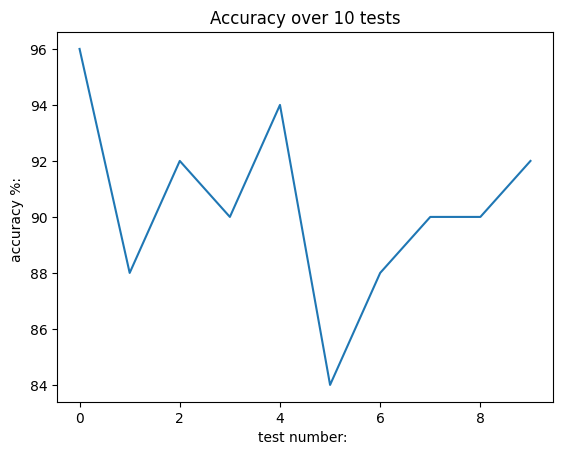

In [155]:
# plot out the accuracies of the predictions
plt.plot([i for i in range(len(accuracies))], accuracies)
plt.title("Accuracy over 10 tests")
plt.xlabel("test number: ")
plt.ylabel("accuracy %: ")
plt.show()

In [151]:
# calculate the average accuracy of the predictions
medium_accuracy = 0
for accuracy in accuracies:
    medium_accuracy += accuracy

medium_accuracy = medium_accuracy / len(accuracies)

print(f"medium accuracy is: {round(medium_accuracy, 2)}% ")


medium accuracy is: 92.2% 
